In [110]:
from pyspark.sql import SparkSession
import pandas as pd

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [111]:
df_iris = spark.read.csv(
    'iris.csv',
    sep=',',
    header=True,
)
df_iris.printSchema()

root
 |-- sepal.length: string (nullable = true)
 |-- sepal.width: string (nullable = true)
 |-- petal.length: string (nullable = true)
 |-- petal.width: string (nullable = true)
 |-- variety: string (nullable = true)



In [ ]:
# при считывании данных функция spark.read.csv неверно определяет типы данных, поэтому
# зададим явно структуру входных данных с помошью StructField() и StructType()

In [112]:
from pyspark.sql.types import *

df_schema = [
               StructField('sepal.length', DoubleType(), True),
               StructField('sepal.width', DoubleType(), True),
               StructField('petal.length',DoubleType(), True),
               StructField('petal.width', DoubleType(), True),
               StructField('variety', StringType(), True),
            ]
df_format = StructType(fields = df_schema)

df_iris = spark.read.csv(
    'iris.csv',
    sep=',',
    header=True,
    schema = df_format
)
df_iris.printSchema()

root
 |-- sepal.length: double (nullable = true)
 |-- sepal.width: double (nullable = true)
 |-- petal.length: double (nullable = true)
 |-- petal.width: double (nullable = true)
 |-- variety: string (nullable = true)



In [ ]:
# выведем названия столбцов датасета

In [113]:
df_iris.columns

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [116]:
# Проверим на соответствие созданого датасета ( типы данных) данным в исходном файле
df_iris.head(4)

[Row(sepal.length=5.1, sepal.width=3.5, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.0, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.7, sepal.width=3.2, petal.length=1.3, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.6, sepal.width=3.1, petal.length=1.5, petal.width=0.2, variety='Setosa')]

In [ ]:
#!!! Использование точки в названии аттрибута ( ex. sepal.length) приводит к ошибке, связанной  
# с использованием в имени знака пунктуации ".". Поэтому переименуем столбцы датасета

In [117]:
df_iris = df_iris.withColumnRenamed("sepal.length", "sepallength")
df_iris = df_iris.withColumnRenamed("sepal.width", "sepalwidth")
df_iris = df_iris.withColumnRenamed("petal.length", "petallength")
df_iris = df_iris.withColumnRenamed("petal.width", "petalwidth")
df_iris.printSchema()

root
 |-- sepallength: double (nullable = true)
 |-- sepalwidth: double (nullable = true)
 |-- petallength: double (nullable = true)
 |-- petalwidth: double (nullable = true)
 |-- variety: string (nullable = true)



In [118]:
df_iris.columns # проверим названия столбцов

['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'variety']

In [ ]:
# С помощью команды groupBy() определим max, min, avg для аттрибутов
# ('sepallength', 'sepalwidth', 'petallength', 'petalwidth') для каждого цветка

In [119]:
df_iris.select(['variety','sepallength','sepalwidth', 'petallength', 'petalwidth'])\
    .groupBy('variety')\
    .max()\
    .show()

+----------+----------------+---------------+----------------+---------------+
|   variety|max(sepallength)|max(sepalwidth)|max(petallength)|max(petalwidth)|
+----------+----------------+---------------+----------------+---------------+
| Virginica|             7.9|            3.8|             6.9|            2.5|
|    Setosa|             5.8|            4.4|             1.9|            0.6|
|Versicolor|             7.0|            3.4|             5.1|            1.8|
+----------+----------------+---------------+----------------+---------------+



In [120]:
df_iris.select(['variety','sepallength','sepalwidth', 'petallength', 'petalwidth'])\
    .groupBy('variety')\
    .min()\
    .show()

+----------+----------------+---------------+----------------+---------------+
|   variety|min(sepallength)|min(sepalwidth)|min(petallength)|min(petalwidth)|
+----------+----------------+---------------+----------------+---------------+
| Virginica|             4.9|            2.2|             4.5|            1.4|
|    Setosa|             4.3|            2.3|             1.0|            0.1|
|Versicolor|             4.9|            2.0|             3.0|            1.0|
+----------+----------------+---------------+----------------+---------------+



In [147]:
df_iris.select(['variety','sepallength','sepalwidth', 'petallength', 'petalwidth'])\
    .groupBy('variety')\
    .avg()\
    .show()

+----------+-----------------+------------------+------------------+------------------+
|   variety| avg(sepallength)|   avg(sepalwidth)|  avg(petallength)|   avg(petalwidth)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [134]:
# строим точечную диаграмму для petal length и petal width
from matplotlib import pyplot as plt
import seaborn as sns

In [145]:
# Для работы с seaborn и matplotlib создадим датафрейм в pandas
flower = df_iris.select(['petallength', 'petalwidth','variety']).toPandas()
flower.head()

,petallength,petalwidth,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa


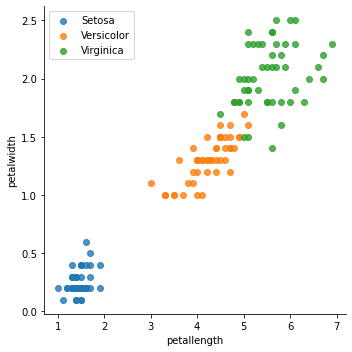

In [144]:
# Точечная диаграмма
sns.lmplot( x="petallength", y="petalwidth", data=flower, fit_reg=False, hue='variety', legend=False)
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Из диаграммы можно сформулировать правило: если значение petallength < 2.5 or petalwidth < 0,65,
# то это цветок Setosa, если 0.7 < petalwidth < 1,6 and 3 < petallength < 5 то это цветок Versicolor
# если petalwidth > 1,65 or petallength > 5,5, то это цветок Virginica
# На диаграмме заметно наличие области пересечения значений параметров для Virginica и Versicolor,
# что будет влиять на точность модели прогноза.

In [197]:
# Создаем дополнительный столбец ( forecast ) для внесения в него типов цветков в соответствии
# с моделью предсказаний на основании точечной диаграммы по параметру petalwidth

from pyspark.sql.functions import when

df_iris = df_iris.withColumn('forecast', when(df_iris['petalwidth'] <= 0.65,'Setosa')
                                         .when(df_iris['petalwidth']>= 1.65,'Virginica')
                                         .otherwise('Versicolor'))
df_iris.show(5)
# посчитаем количество строк, где по значениям признаков было точно предсказан вариант цветка
df_w = df_iris.filter(df_iris['variety'] == df_iris['forecast'])
print(f"% правильных предсказаний ( параметр petalwidth):- {df_w.count()/df_iris.count()}")                                       

+-----------+----------+-----------+----------+-------+--------+
|sepallength|sepalwidth|petallength|petalwidth|variety|forecast|
+-----------+----------+-----------+----------+-------+--------+
|        5.1|       3.5|        1.4|       0.2| Setosa|  Setosa|
|        4.9|       3.0|        1.4|       0.2| Setosa|  Setosa|
|        4.7|       3.2|        1.3|       0.2| Setosa|  Setosa|
|        4.6|       3.1|        1.5|       0.2| Setosa|  Setosa|
|        5.0|       3.6|        1.4|       0.2| Setosa|  Setosa|
+-----------+----------+-----------+----------+-------+--------+
only showing top 5 rows

% правильных предсказаний ( параметр petalwidth):- 0.96


In [198]:
# Создаем дополнительный столбец ( forecast ) для внесения в него типов цветков в соответствии
# с моделью предсказаний на основании точечной диаграммы по параметру petallength

df_iris = df_iris.withColumn('forecast', when(df_iris['petallength'] <= 2.5,'Setosa')
                                         .when(df_iris['petallength']>= 5.0,'Virginica')
                                         .otherwise('Versicolor'))
df_iris.show(5)
df_l = df_iris.filter(df_iris['variety'] == df_iris['forecast'])
print(f"% правильных предсказаний ( параметр petallength):- {df_w.count()/df_iris.count()}")

+-----------+----------+-----------+----------+-------+--------+
|sepallength|sepalwidth|petallength|petalwidth|variety|forecast|
+-----------+----------+-----------+----------+-------+--------+
|        5.1|       3.5|        1.4|       0.2| Setosa|  Setosa|
|        4.9|       3.0|        1.4|       0.2| Setosa|  Setosa|
|        4.7|       3.2|        1.3|       0.2| Setosa|  Setosa|
|        4.6|       3.1|        1.5|       0.2| Setosa|  Setosa|
|        5.0|       3.6|        1.4|       0.2| Setosa|  Setosa|
+-----------+----------+-----------+----------+-------+--------+
only showing top 5 rows

% правильных предсказаний ( параметр petallength):- 0.96


In [ ]:
# Заключение: Созданная на основании точечной диаграммы модель предсказаний обладает точностью 96%
# Такая точнось прогноза является следствием того что у цветов Virginica и Versicolor имеется
# область "пересечения" значений параметров